In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

import os
print(os.listdir("../input"))


In [ ]:
df_level = pd.read_csv('../input/chennai_reservoir_levels.csv')
df_rain = pd.read_csv('../input/chennai_reservoir_rainfall.csv')

In [ ]:
df_level.head()

In [ ]:
df_rain.head()

In [ ]:
df_level.info()

In [ ]:
df_rain.info()

In [ ]:
# Convert date columns to date format & make them index
df_level['Date'] = pd.to_datetime(df_level['Date'],format='%d-%m-%Y')
df_rain['Date'] = pd.to_datetime(df_rain['Date'],format='%d-%m-%Y')
df_level.set_index('Date',drop=True,inplace=True)
df_rain.set_index('Date',drop=True,inplace=True)

In [ ]:
# Check for any missing values
print(df_level.isna().sum())
print(df_rain.isna().sum())

In [ ]:
# Observe the water levels over the years in each reservoir
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(20, 4)})
plt.plot(df_level['POONDI'])
plt.plot(df_level['CHOLAVARAM'])
plt.plot(df_level['CHEMBARAMBAKKAM'])
plt.plot(df_level['REDHILLS'])
plt.legend(loc='best')
plt.title('Storage level in Reservoir')

* Of all the 4 reservoirs, Cholavaram lake has smaller storage capacity (881 mcft) while the rest are around 3300
* All of reservoirs touched their maximum storage capacity (approx.) between 2006 - 2013, started to decline there after.
* Capacity has touched its maximum again in early 2016. This can attributed to the severe floods the city has faced during fag end of 2015.
* However, despite reaching maximum capacity in early 2016, storage levels have dropped steeply than never before , from 2016 to end of 2017
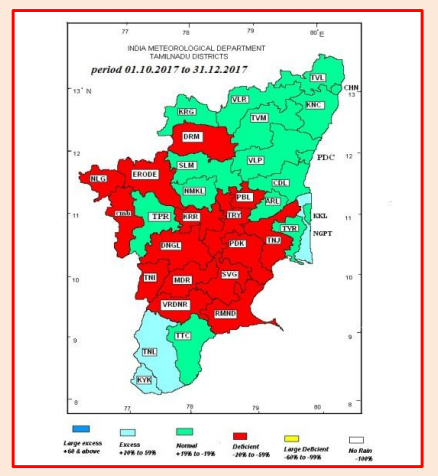
* Despite normal monsoon in 2017, the water levels haven't gone up. This could be either due to rain water not properly channelized to the reservoirs or usage has increased beyond the replenishment & probably no control over water usage from reservoir.
* Same is evident from the rainfall plot below. Year 2017 rainfall could be seen as 5th best year in terms of rainfall in the entire 15 year. However, water levels haven't reached appreciable level.

In [ ]:
sns.set(rc={'figure.figsize':(20, 7)})
plt.plot(df_rain['POONDI'])
plt.plot(df_rain['CHOLAVARAM'])
plt.plot(df_rain['CHEMBARAMBAKKAM'])
plt.plot(df_rain['REDHILLS'])
plt.legend(loc='best')
plt.title('Rainfall in Reservoir')

In [ ]:
# Reservoir availability in percent of it's full capacity
sns.set(rc={'figure.figsize':(20, 4)})
plt.plot(df_level['POONDI']/3231)
plt.plot(df_level['CHOLAVARAM']/881)
plt.plot(df_level['CHEMBARAMBAKKAM']/3645)
plt.plot(df_level['REDHILLS']/3300)
plt.legend(loc='best')
plt.title('Reservoir Storage % in terms of full capacity')

According to UN World Urbanization Prospects (& some information available here http://worldpopulationreview.com/world-cities/chennai-population/ basis that), below is the population of Chennai over the years, growing at 2.6% annually.
Year	Population
2005	7476986
2006	7671387.636
2007	7870843.715
2008	8075485.651
2009	8285448.278
2010	8500869.933
2011	8721892.552
2012	8948661.758
2013	9181326.964
2014	9420041.465
2015	9664962.543
2016	9916251.569
2017	10174074.11
2018	10438600.04
2019	10710003.64
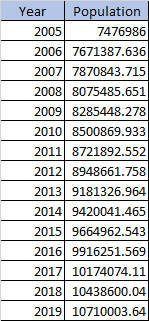

In [ ]:
# Create data frame for population
data = {'Year':[2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019],'Population':[7476986,7671388,7870844,8075486,8285448,8500870,8721893,8948662,9181327,9420041,9664963,9916252,10174074,10438600,10710004]}
df_population = pd.DataFrame(data)

In [ ]:
df_population.head()

In [ ]:
# Calculate change of water level in reservoir, per day. This can be considered as water used for drinking water needs 
# of the city
df_level_change = df_level.diff(periods=-1)

In [ ]:
print(df_level.head())
print(df_level_change.head())

In [ ]:
# Plot usage/water drawn from each reservoir 
# Reservoir availability in percent of it's full capacity
sns.set(rc={'figure.figsize':(20, 10)})
plt.plot(df_level_change['POONDI'])
plt.plot(df_level_change['CHOLAVARAM'])
plt.plot(df_level_change['CHEMBARAMBAKKAM'])
plt.plot(df_level_change['REDHILLS'])
plt.legend(loc='best')
plt.title('Water usage from each of the reservoir')

In [ ]:
# Calculate total water drawn from all reservoirs per day & aggregate at Year level
df_level_change['Total_Water_Used'] = df_level_change['POONDI']+df_level_change['CHEMBARAMBAKKAM']+df_level_change['CHOLAVARAM']+df_level_change['REDHILLS']
df_level_change['Year'] = df_level_change.index
df_level_change['Quarter'] = df_level_change['Year'].dt.quarter
df_level_change['Year'] = df_level_change['Year'].dt.year

In [ ]:
df_water_usage_year = pd.DataFrame(df_level_change.groupby('Year')[['Total_Water_Used','POONDI','CHEMBARAMBAKKAM','CHOLAVARAM','REDHILLS']].sum())
df_water_usage_quarter = pd.DataFrame(df_level_change.groupby(['Year','Quarter'])[['Total_Water_Used','POONDI','CHEMBARAMBAKKAM','CHOLAVARAM','REDHILLS']].sum())

In [ ]:
df_water_usage_year.reset_index(inplace=True)
df_water_usage_quarter.reset_index(inplace=True)

In [ ]:
# Merge with population data to check water usage 
df_water_usage_year = pd.merge(df_water_usage_year,df_population,on='Year')
df_water_usage_quarter = pd.merge(df_water_usage_quarter,df_population,on='Year')

In [ ]:
plt.figure(figsize=(15,4))
plt.bar(df_population['Year'],df_population['Population'])
plt.title('Population Growth')
plt.xlabel('Year')
plt.ylabel('Population (10 million)')

In [ ]:
# Plot stacked bar of water usage from each reservoir
df_water_usage_quarter_2 = pd.DataFrame(df_level_change.groupby(['Year','Quarter'])[['POONDI','CHEMBARAMBAKKAM','CHOLAVARAM','REDHILLS']].sum())
a = df_water_usage_quarter_2.plot(kind='bar',stacked=True)
plt.savefig('stacked.png')
plt.title('Water Usage from each Reservoir every Quarter')
plt.show()

More water seems to be used from Red Hills & Poondi, than the rest 2
* While very year, replenishment happens in 4th quarter when the city receives North East Monsoon, 2016 seems to be the driest year so far with very minimal replenishment.
* Post 2015, POONDI, REDHILLS were used as usual. This could be one of the major causes for crisis, as these 2 are the major reservoirs 

In [ ]:
# Calculate Water usage per person 
df_water_usage_year['Usage_per_person'] = df_water_usage_year['Total_Water_Used']/df_water_usage_year['Population']

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df_water_usage_year['Year'],df_water_usage_year['Usage_per_person'], lw=4,c='red',ls='-.')
plt.xlabel('Year')
plt.ylabel('Usage per person (mcft)')
plt.title('Usage per person over years')

* As we have seen 2016 is the driest year & the same year has maximum usage of reservoir water per person.
* Owing to less/no rains, it seems groud water couldn't cater to the needs. Hence people had to rely on more resevoir water in 2016.
* As 2017 again has good rains (comparitively), water usage from resevoirs has reduced in 2018.
* However, on the initial analysis, we are having a delayed effect of 2016 even now, coupled with increasing population, water needs & weak monsoons.